Topic: Edge Detection By Laplacians.
    
Using laplacian of Gaussian is an interesting method to find edges, however not the best. 
For this assignment, you have to
1. calculate a 2D LOG kernel, 
2. and find edges in the given image using laplacian, choose the threshold value yourself and see the effect on edges as you change the thresh value.

For the latter, however, the kernel generated in 1. should not be used.

1. An $O(N^{2}*M^{2})$ solution would not be accepted for the edge detection part. Sadly, there is no test case for that.(Thank jupyter notebooks for being so inconsistent when it comes to computation speed.).
2. The edge detection part has to be done with an $O(N^{2}*M)$ algorithm. :3
3. Write the code in the spaces given.
4. Use of cv2 lib functions is forbidden unless mentioned explicitly.

P.S. Read the instructions and the code carefully.

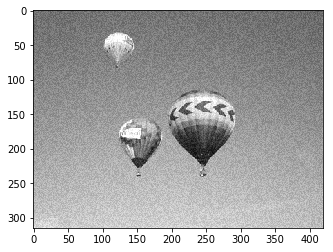

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from time import time

img = cv2.imread("balloonGrayNoisy.jpg", 0)
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [6]:
def gaussian(sig, size):
    Gx = np.zeros((1,size), np.float32)
    for x in range(0, size):
        Gx[0][x] = (x - int(size/2))**2

    Gx = np.exp(-Gx/(2*sig**2))

    return Gx

def laplacian(sig, size):
    Gxx = np.zeros((1, size), np.float32)
    c = np.zeros((1, size), np.float32)
    e = np.zeros((1, size), np.float32)

    for i in range(0, size):
        x = float(i - int(size/2))
        c[0][i] = -((sig**2) - x**2)
        e[0][i] = -(x**2)/(2*sig**2)

    Gxx = c*np.exp(e)
    return Gxx

def logGenerator(sigma, size):
    '''
    Input: Size of the filter required and standard deviation for the gaussian part.
    Output: A kernel that calculates the laplacian of gaussian for the image, 
            and has the required parameters. 
    '''
    
    #write your code here
    
    Gx = gaussian(sigma, size)
    Gxx = laplacian(sigma, size)
    
    kernel = Gx*Gxx.T + Gx.T*Gxx
    
    #the output should be named kernel.
    #I am doing the normalisation part myself
    
    kernel = (kernel/kernel[0][2]).astype(int)
    
    return kernel

In [7]:
def LOGEdges(I, size, thresh):
    '''
    Input: Image I, size of the kernel, 
    Output: Convolve the image and output the result you get after thresholding.
            Choose the threshold value you think is the most appropriate.
            
    You can use the function cv2.filter2D for the convolution 
    part and cv2.threshold for the thresholding part.
    
    Goes without saying that you gotta read their documentation first :p.
    '''
    
    edges = np.zeros(I.shape, np.uint8)   #this has to be the output image
    
    #write your code here
    
    Gx = gaussian(1.4, 9)
    Gxx = laplacian(1.4, 9)
    K = Gx*Gxx.T + Gx.T*Gxx
    
    #Four step convolution
    ti = time()
    edges1 = cv2.filter2D(cv2.filter2D(I.astype(float), -1, Gx), -1, Gxx.T) + cv2.filter2D(cv2.filter2D(I.astype(float), -1, Gx.T), -1, Gxx)
    tf = time()

    t1 = tf-ti
    print("four step convolution:" + str(t1) + " ms")
    
    #One step convolution
    ti = time()
    edges2 = cv2.filter2D(I.astype(float), -1, K)
    tf = time()
    
    t2 = tf-ti
    print("one step convolution:" + str(t2) + " ms")
    print("4 step algo is " + str(t2/t1) + " times faster")
    out = np.zeros(edges.shape, np.float32)
    
    #zero crossings in y direction
    for i in range(edges1.shape[0]-2):
        for j in range(edges1.shape[1]):
            if(edges1[i][j]*edges1[i+2][j] <= 0):
                out[i+1][j] = abs(edges1[i+2][j] - edges1[i][j])

    #zero crossings in x direction.
    for i in range(edges1.shape[0]):
        for j in range(edges1.shape[1]-2):
            if(edges1[i][j]*edges1[i][j+2] <= 0):
                out[i][j+1] = max(abs(edges1[i][j+2] - edges1[i][j]), out[i][j+1])

    resultplot = plt.imshow(out, cmap='gray', vmin=0, vmax=255)
    plt.show()
    print (" without thresholding\n(Increasing the sigma may eliminate this noise even without applying a threshold.)")
    
    #threshold the zero crossings.
    _, out = cv2.threshold(out, thresh, 255, cv2.THRESH_BINARY)
    
    edges = out
    
    resultplot = plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
    plt.show()
    print ("after thresholding")
    
    return edges

four step convolution:0.003954172134399414 ms
one step convolution:0.007841348648071289 ms
4 step algo is 1.9830569791980706 times faster


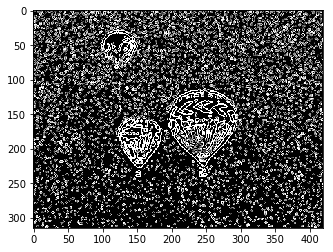

 without thresholding
(Increasing the sigma may eliminate this noise even without applying a threshold.)


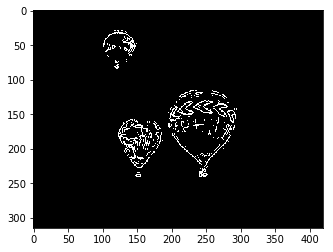

after thresholding


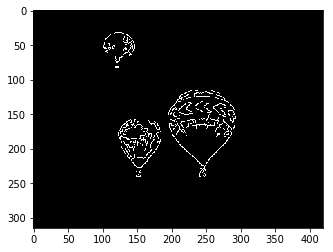

canny edges


[[  0   0   1   1   2   1   1   0   0]
 [  0   1   3   4   5   4   3   1   0]
 [  1   3   5   3   0   3   5   3   1]
 [  1   4   3 -11 -23 -11   3   4   1]
 [  2   5   0 -23 -40 -23   0   5   2]
 [  1   4   3 -11 -23 -11   3   4   1]
 [  1   3   5   3   0   3   5   3   1]
 [  0   1   3   4   5   4   3   1   0]
 [  0   0   1   1   2   1   1   0   0]]


Test Case Passed 👍


In [10]:
def evaluate():
    #DO NOT MAKE ANY CHANGE TO THIS FUNCTION UNLESS ASKED TO.
    
    K = logGenerator(1.4, 9)
    th = 460           #INPUT the thresh value you want to use for thresholding the zero crossings.
    res = LOGEdges(img, 5,th)
    
    #this is the most accurate edge detection algorithm available, canny edge detection.
    #compare your convolution result with this. How can you make your algo more robust?
    I = cv2.GaussianBlur(img, (5,5), 0)
    canny = cv2.Canny(I, 70, 140)
    
    exapleplot = plt.imshow(canny, cmap='gray', vmin=0, vmax=255)
    plt.show()
    print ("canny edges\n\n")
    
    print(K)
    print("\n")
    
    assert(np.all(np.isclose(K, np.array([[  0,   0,   1,   1,   2,   1,   1,   0,   0],
                                          [  0,   1,   3,   4,   5,   4,   3,   1,   0],
                                          [  1,   3,   5,   3,   0,   3,   5,   3,   1],
                                          [  1,   4,   3, -11, -23, -11,   3,   4,   1],
                                          [  2,   5,   0, -23, -40, -23,   0,   5,   2],
                                          [  1,   4,   3, -11, -23, -11,   3,   4,   1],
                                          [  1,   3,   5,   3,   0,   3,   5,   3,   1],
                                          [  0,   1,   3,   4,   5,   4,   3,   1,   0],
                                          [  0,   0,   1,   1,   2,   1,   1,   0,   0]]), atol=1)))
    
    print('Test Case Passed', '\U0001F44D')
    
if __name__ == "__main__":
    evaluate()